In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
starrings = pd.read_csv('./data/starrings_full.csv')

In [3]:
starrings.head()

,owner,repo,starred_at,user.login,user.site_admin,user.type,user.id
0,npm,marky-markdown,2014-12-19T22:20:50Z,ceejbot,False,User,757502
1,npm,marky-markdown,2015-01-06T09:12:49Z,sorrycc,False,User,35128
2,npm,marky-markdown,2015-01-14T18:56:14Z,bcoe,False,User,194609
3,npm,marky-markdown,2015-01-26T21:30:28Z,pose,False,User,419703
4,npm,marky-markdown,2015-01-29T16:43:08Z,mattallty,False,User,178616


In [4]:
starrings.shape

(1829731, 7)

### {repo: [user.id1, user.id2, ...]}

In [5]:
repos_users_map = {} 

In [6]:
repos = starrings['repo'].unique().tolist()

In [7]:
len(repos)

704

In [8]:
for repo in repos:
    repos_users_map[repo] = starrings[starrings['repo'] == repo]['user.id'].unique().tolist()

In [24]:
with open('./data/repos_users_map.json', 'w') as fp:
    json.dump(repos_users_map, fp)

### {'repo1_repo2' : [repo1, repo2, [common_users], is_connected]}

In [25]:
repo_repo_users = {}

In [29]:
for k1, v1 in repos_users_map.iteritems():
    for k2, v2 in repos_users_map.iteritems():
        if k1 == k2:
            continue
        key = '_'.join(sorted([k1, k2]))
        if key in repo_repo_users.keys():
            continue
        common_users = list(set(v1) & set(v2))
        is_connected = len(common_users) != 0
        repo_repo_users[key] = [k1, k2, common_users, is_connected]

In [30]:
len(repo_repo_users.keys()) # total 247456

247456

### [repo1, repo2, [common_users], is_connected]

In [31]:
import csv
with open("./data/repo_repo_users.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(repo_repo_users.values())

In [32]:
repo_repo_users.values()[0:2]

[['oozie', 'PTVS', [3054232, 5772169, 1673081, 5877145], True],
 ['mysql-server',
  'kobold',
  [2882, 48936, 54254, 10000, 227057, 2041398],
  True]]

In [3]:
repo_repo_users = pd.read_csv('./data/repo_repo_users.csv', header=None)

In [4]:
repo_repo_users.columns = ['Source', 'Target', 'common_users', 'is_connected']

In [5]:
repo_repo_users['Weight'] = repo_repo_users['common_users'].apply(lambda x : len(x))

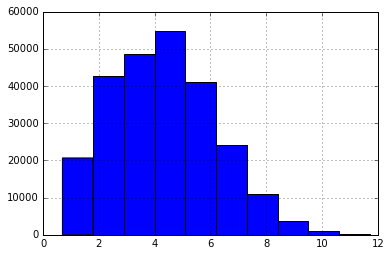

In [8]:
np.log(repo_repo_users['Weight']).hist()

In [9]:
repo_repo_users['Weight'] = repo_repo_users['Weight'].apply(lambda x : np.log(x))

In [10]:
repo_repo_users.head()

,Source,Target,common_users,is_connected,Weight
0,oozie,PTVS,"[3054232, 5772169, 1673081, 5877145]",True,3.583519
1,mysql-server,kobold,"[2882, 48936, 54254, 10000, 227057, 2041398]",True,3.784190
2,flux,rake,"[5161474, 6025220, 322054, 4685837, 9990676, 5...",True,7.080026
3,material-design-icons,WebFundamentals,"[8880128, 393220, 1572872, 1097738, 5472278, 5...",True,9.683215
4,jstorm,cdk,"[650753, 3584226, 2773827, 2123078, 693320, 54...",True,4.634729


In [11]:
repo_repo_users[['Source', 'Target', 'Weight']].to_csv('./data/repo_repo_counts.csv', index=False)